# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - определить факторы, которые больше всего влияют на рыночную стоимость объектов недвижимости.

**Задачи исследования**:
1. Изучить параметры объявлений и описать наблюдения по ним;
2. Изучить, как быстро продавались квартиры;
3. Изучить, зависит ли цена от общей площади, жилой площади, площади кухни, количества комнат, этажа, даты размещения. Определить, какие факторы больше всего влияют на общую (полную) стоимость объекта;
4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
5. Определить как стоимость объектов зависит от расстояния до центра города.

**Ход исследования**

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Проверив данные на ошибки, на этапе предобработки будем искать возможность исправить самые критичные из них.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных;
 2. Предобработка данных;
 3. Исследовательский анализ данных и проверка гипотез.

### Откройте файл с данными и изучите общую информацию. 

Загружаем данные из файла:

In [172]:
import pandas as pd 

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выводим основную информацию:

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Строим общую гистограмму для всех столбцов таблицы:

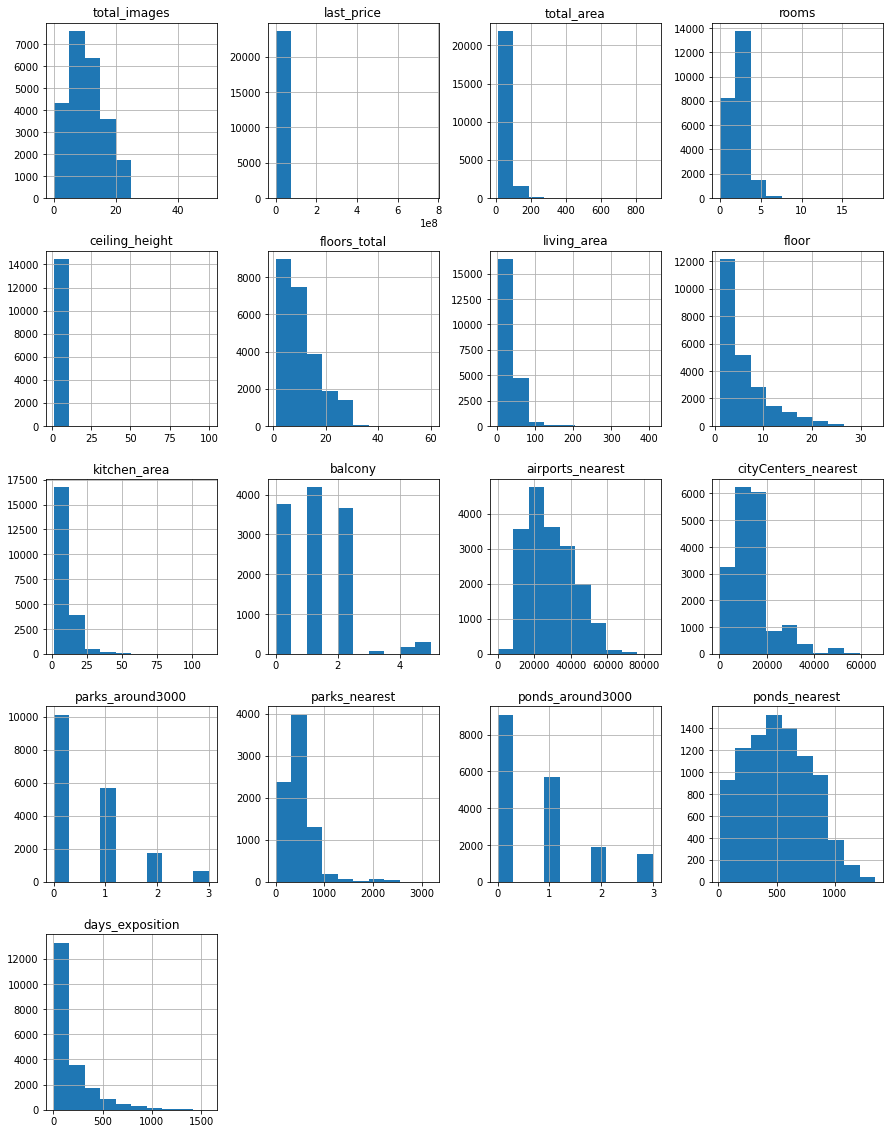

In [174]:
data.hist(figsize=(15, 20));

Определяем, в каких столбцах есть пропуски:

In [175]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверяем на наличие явных дубликатов:

In [176]:
data.duplicated().sum()

0

**Выводы**

В таблице 23 699 записей и 22 столбца. Данных достаточно для проверки гипотез. 
Явных дубликатов нет, однако количество значений в 14 столбцах (`ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`) различается - значит, в данных есть пропущенные значения.
Чтобы двигаться дальше, нужно устранить проблемы в данных.

### Предобработка данных

Заполняем пропущенные значения, где это возможно.

Если продавец не указал число балконов, то, скорее всего, их в квартире нет. Такие пропуски правильно заменить на 0:

In [177]:
data.loc[data['balcony'].isna(), 'balcony'] = 0 

Если продавец не указал признак апартамента, то, скорее всего, это обычная квартира. Такие пропуски правильно заменить на False (не является апартаментом):

In [178]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

Если продавец не указал число парков в радиусе 3 км, то, скорее всего, их поблизости нет. Такие пропуски правильно заменить на 0:

In [179]:
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 0

Если продавец не указал число водоёмов в радиусе 3 км, то, скорее всего, их поблизости нет. Такие пропуски правильно заменить на 0:

In [180]:
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 0

Жилую площадь можно аппроксимировать через коэффициент отношения жилой площади к общей площади для объектов с заполненными значениями:

In [181]:
live_to_total = data.loc[~data['living_area'].isna(), 'living_area'] / data.loc[~data['living_area'].isna(), 'total_area']
live_to_total_coef = live_to_total.median()

data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * live_to_total_coef

Площадь кухни можно аппроксимировать через коэффициент отношения площади кухни к общей площади для объектов с заполненными значениями:

In [182]:
kitchen_to_total = data.loc[~data['kitchen_area'].isna(), 'kitchen_area'] / data.loc[~data['kitchen_area'].isna(), 'total_area']
kitchen_to_total_coef = kitchen_to_total.median()

data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'total_area'] * kitchen_to_total_coef

Проверим результат - убедимся, что пропуски в вышеуказанных параметрах теперь отсутствуют:

In [183]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Причинами появления пропусков могут быть сокрытие информации - например, нежелание автора объявления указывать некоторые параметры объектов. Также могут сказаться ошибки ввода данных при создании объявления на странице сервиса Яндекс.Недвижимость.

Преобразуем строковое значение даты публикации в формат даты:

In [184]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

В данном случае, изменение типа данных необходимо для последующего определения дня недели, месяца и года даты публикации объявления методами, применимым только к объекут типа datetime.


Преобразуем значение всего этажей в доме в целочисленное:

In [185]:
data['floors_total'] = data['floors_total'].fillna(0).astype(int)

В данном случае, изменение типа данных необходимо c логической точки зрения - дробых этажей не бывает.

In [186]:
# Изучаем уникальные значения в столбце с названиями
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [187]:
# Устраняем неявные дубликаты
data['locality_name'] = data['locality_name'].replace('поселок', 'посёлок') # во всех названиях посёлок будет через Ё
data['locality_name'] = data['locality_name'].replace('посёлок городского типа', 'посёлок') 

Устранить неявные дубликаты по названию необходимо, так как в последующем будет выполняться группировка по этому параметру с определением количества объявлений в каждом населённым пункте.

Находим редкие и выбивающиеся значения для высоты потолков в метрах:

In [188]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [189]:
# Устраняем редкие и выбивающие значения для высоты потолков в м
filter = data['ceiling_height'] >= 20
data.loc[filter, 'ceiling_height'] = data.loc[filter, 'ceiling_height'] / 10

In [190]:
# Проверяем, что корректное значение восстановлено
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

В случае параметра «высота потолков» природа аномалии понятна и данные действительно искажены - скорее всего, вместо двузначных чисел, больше или равные 20, должны быть вещественные числа - между цифрами должен быть разделить целой и дробной части. Тогда исходные значения 25, 32, 27, 24, 26, 20, 22,6, 27,5 и 100 м уменьшатся на порядок и аномально выские значения исчезнут.

<div class="alert alert-info"> <b>Комментарии студента:</b>
    
1. Пропуски в расстояниях до ближайшего аэропорта, парка, водоёма можно не заполнять (хотя их много), так как они не участвуют в последующих расчётах. К тому же стандартными методами это сделать не получится (нужно по адресу объекта в результате операции геокодирования определить геодезические координаты - широту и долготу и иметь тематический слой целевых объектов - водоёмов, парков, аэропортов - тогда можно будет рассчитать расстояние). Пропусков в названиях населённых пунктов незначительно (49 / 23699 * 100 ~ 0.2 %), поэтому ими можно пренебречь, хотя они и участвуют в исследовании. Такая же ситуация с параметром «всего этажей в доме» (86 / 23699 * 100 ~ 0.36 %) В расчётах также не участвует параметр «высота потолков», поэтому их тоже можно не заполнять. В расчётах не участвуют параметры «число балконов», «число парков в радиусе 3 км», «число водоёмов в радиусе 3 км»  и «апартаменты», однако логика их заполнения проста, поэтому пропуски в них устранили. Параметр «расстояние до центра города» участвут в рассчётах, однако стандартными методами пустые значения заполнить не получится. К тому же в пределах Санкт-Петербурга наблюдений достаточно для исследования. Параметр «сколько дней было размещено объявление (от публикации до снятия)» используется в расчётах, однако заполнить его без дополнительных сведений невозможно.
    
2. Измнение типа данных параметра «всего этажей в доме» проблему не решило, причина не в этом. Оставил этот этап с логической точки зрения - дробных этажей не бывает.


### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра:

In [191]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

День недели, месяц и год публикации:

In [192]:
data['first_day_exposition_weekday'] = data['first_day_exposition'].dt.day_of_week # день недели публикации объявления
data['first_day_exposition_month'] = data['first_day_exposition'].dt.month # месяц публикации объявления
data['first_day_exposition_year'] = data['first_day_exposition'].dt.year # год публикации объявления

Тип этажа квартиры:


In [193]:
'''
# почему-то с apply возвращает некорректный результат - все этажи попадают в категорию 'другой'
def categorize_floor(floor, floors_total):
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        pass
data['floor_type'] = data.apply(lambda x: categorize_floor('floor', 'floors_total'), axis=1) '''


data['floor_type'] = 'другой'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний' 

Расстояние до центра города в километрах:

In [194]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)

Проверяем, что новые столбцы добавились в таблицу:

In [195]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,90.289724,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.400000,5,False,...,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.600000,6,False,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,40.658769,22,False,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.430000,26,False,...,NaN,0.0,NaN,189.0,87454.764777,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0


**Выводы**

Предобработка данных включала в себя:

- заполнение пропущенных значений в столбцах `balcony`, `is_apartment`, `living_area`, `kitchen_area`,
`parks_around3000` и `ponds_around3000`;
- изменение типа данных столбца `first_day_exposition` и `floors_total`;
- обработку аномальных значений столбца `ceiling_height`;
- удаление неявных дубликатов для столбца `locality_name`,
- добавление новых столбцов - цена одного квадратного метра, день недели, месяц, год публикации объявления, 
тип этажа квартиры, расстояние до центра города в километрах.

Теперь можно перейти к исследовательскому анализу данных и проверке гипотез.

### Проведите исследовательский анализ данных

Строим гистограмму и рассчитываем описательные статистики для показателя общей площади:

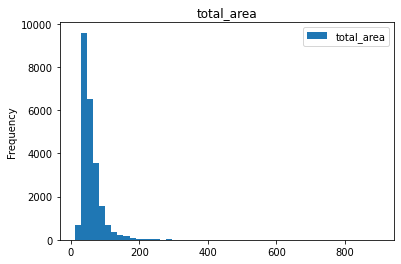

In [196]:
data.plot(y = 'total_area', title = 'total_area', kind='hist', bins = 50);

In [197]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

**Вывод:** Общая площадь. Среднее значение 60, медиана 52, значения изменяются от 12 до 900 квадратных метров. Нормальное распределение, смещённое в сторону больших значений.

Строим гистограмму и рассчитываем описательные статистики для показателя жилой площади:

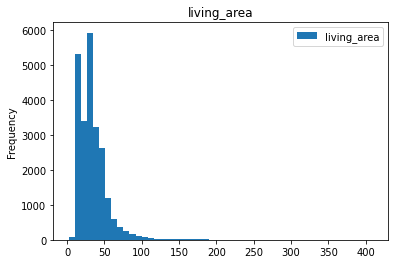

In [198]:
data.plot(y = 'living_area', title = 'living_area', kind='hist', bins = 50);

In [199]:
data['living_area'].describe()

count    23699.000000
mean        34.578214
std         22.340665
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

**Вывод:** Жилая площадь. Среднее значение 34.6, медиана 30, значения изменяются от 2 до 410 квадратных метров. Нормальное распределение, смещённое в сторону больших значений.

Строим гистограмму и рассчитываем описательные статистики для показателя площади кухни:

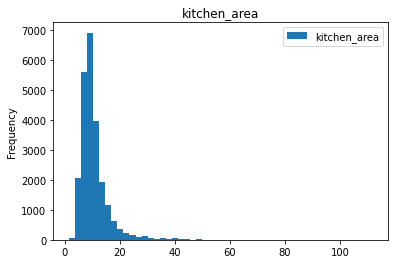

In [200]:
data.plot(y = 'kitchen_area', title = 'kitchen_area', kind='hist', bins = 50);

In [201]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.491431
std          6.029020
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

**Вывод:** Площадь кухни. Среднее значение 10.5, медиана 9, значения изменяются от 1.3 до 112 квадратных метров. Нормальное распределение, смещённое в сторону больших значений.

Строим гистограмму и рассчитываем описательные статистики для показателя цены на момент снятия с публикации:

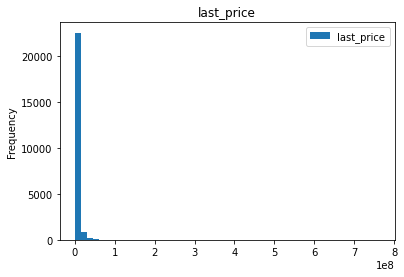

In [202]:
data.plot(y = 'last_price', title = 'last_price', kind='hist', bins = 50);

In [203]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

**Вывод:** Цена объекта. Среднее значение 6 500 000, медиана 4 650 000, значения изменяются от 12 190 до 763 000 000 рублей. Ненормальное распределение.

Строим гистограмму и рассчитываем описательные статистики для показателя числа комнат:

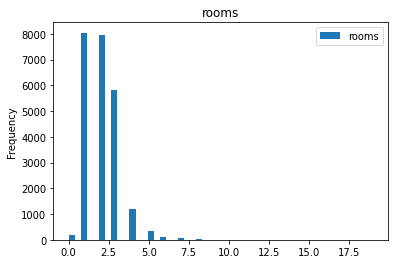

In [204]:
data.plot(y = 'rooms', title = 'rooms', kind='hist', bins = 50);

In [205]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**Вывод:** Количество комнат. Среднее значение 2, медиана 2, значения изменяются от 0 до 19 комнат. Нормальное распределение, смещённое в сторону больших значений.

Строим гистограмму и рассчитываем описательные статистики для показателя высоты потолков:

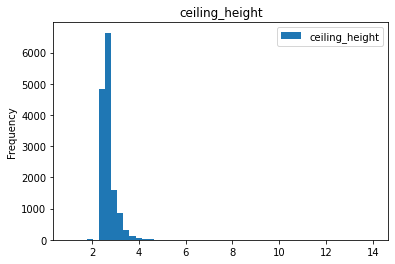

In [206]:
data.plot(y = 'ceiling_height', title = 'ceiling_height', kind='hist', bins = 50);

In [207]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

**Вывод:** Высота потолков. Среднее значение 2.73, медиана 2.65, значения изменяются от 1 до 20 метров. Нормальное распределение, смещённое в сторону больших значений.

Строим гистограмму и рассчитываем описательные статистики для показателя этажа:

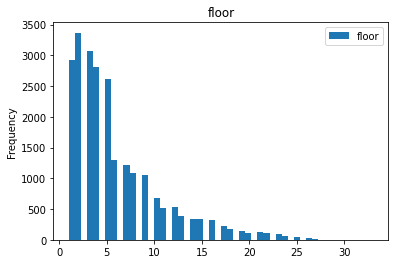

In [208]:
data.plot(y = 'floor', title = 'floor', kind='hist', bins = 50);

In [209]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Вывод:** Этаж квартиры. Среднее значение 6, медиана 4, значения изменяются от 1 до 33 этажей. Ненормальное распределение.

Для параметра «тип этажа» гистограмму стандартным методом построить не получилось, 
так как это категориальные данные и pandas выдаёт ошибку - строим столбчатую диаграмму:

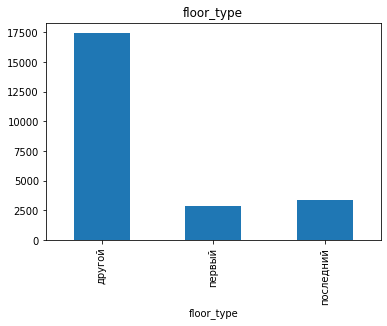

In [210]:
data.groupby('floor_type')['floor_type'].count().plot(kind = 'bar', title='floor_type');

**Вывод:**  Объектов на первом этаже примерно 2 500, что составляет 12,5% от числа всех объвлений. Примерно столько же объектов с последним этажом (чуть больше). Основную массу составляют объявления с типом этажа «другой».

Строим гистограмму и рассчитываем описательные статистики для показателя этажности дома:

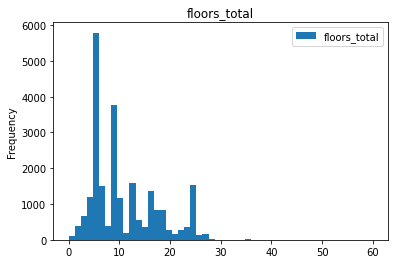

In [211]:
data.plot(y = 'floors_total', title = 'floors_total', kind='hist', bins = 50);

In [212]:
data['floors_total'].describe()

count    23699.000000
mean        10.635090
std          6.616396
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

**Вывод:** Общее количество этажей в доме. Среднее значение 11, медиана 9, значения изменяются от 1 до 60 этажей.
Распределение с несколькими максимумами - ненормальное (на самом деле содержит объекты разных классов - малоэтажные и 
многоэтажные дома, которые по отдельности имеют нормальное распределение).

Строим гистограмму и рассчитываем описательные статистики для показателя расстояния до центра города:

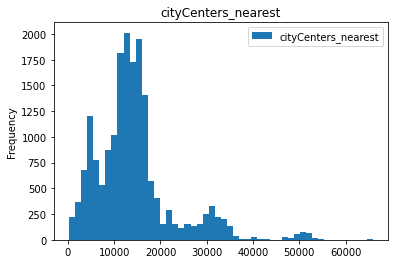

In [213]:
data.plot(y = 'cityCenters_nearest', title = 'cityCenters_nearest', kind='hist', bins = 50);

In [214]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

**Вывод:** Среднее значение 14, медиана 13, значения изменяются от 0.2 до 66 км. Распределение с несколькими максимумами - ненормальное (на самом деле содержит объекты разных классов, которые по отдельности имеют нормальное распределение).

Строим гистограмму и рассчитываем описательные статистики для показателя расстояния до ближайшего аэропорта:

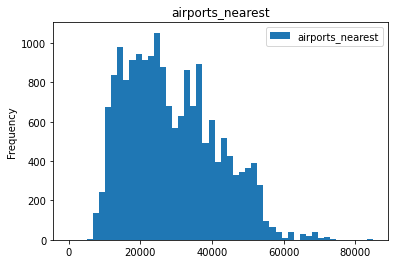

In [215]:
data.plot(y = 'airports_nearest', title = 'airports_nearest', kind='hist', bins = 50);

In [216]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

**Вывод:** Среднее значение 29, медиана 27, значения изменяются от 0 до 85 км. Распределение с несколькими максимумами - ненормальное (на самом деле содержит объекты разных классов, которые по отдельности имеют нормальное распределение).

Строим гистограмму и рассчитываем описательные статистики для показателя расстояния до ближайшего парка:

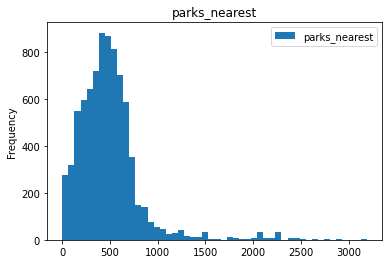

In [217]:
data.plot(y = 'parks_nearest', title = 'parks_nearest', kind='hist', bins = 50);

In [218]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

**Вывод:** Среднее значение 0.5, медиана 0.5, значения изменяются от 0 до 3 км. Нормальное распределение, смещённое в сторону больших значений.

Строим гистограмму и рассчитываем описательные статистики для показателя дня недели публикации объявления:

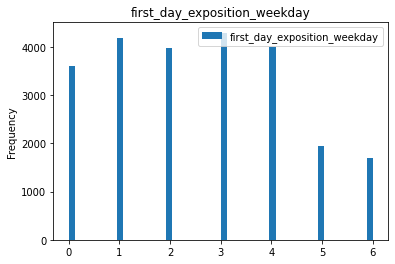

In [219]:
data.plot(y = 'first_day_exposition_weekday', title = 'first_day_exposition_weekday', kind='hist', bins = 50);

In [220]:
data['first_day_exposition_weekday'].describe()

count    23699.000000
mean         2.569307
std          1.789082
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: first_day_exposition_weekday, dtype: float64

**Вывод:**  Чаще всего объявления выкладывают в четверг, но, в целом, в будние количество объявлений примерно одинаково. В выходные наблюдается резкий спад.

Строим гистограмму и рассчитываем описательные статистики для показателя месяца публикации объявления:

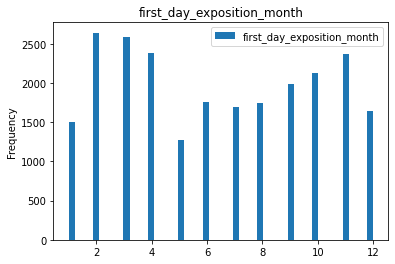

In [221]:
data.plot(y = 'first_day_exposition_month', title = 'first_day_exposition_month', kind='hist', bins = 50);

In [222]:
data['first_day_exposition_month'].describe()

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: first_day_exposition_month, dtype: float64

**Вывод:** Чаще всего объявления выкладывают в феврале, немного меньше в марте, апреле и ноябре. Меньше всего публикуют объявления в мае.

**Выводы**

- Общая площадь. Среднее значение 60, медиана 52, значения изменяются от 12 до 900 квадратных метров;
- Жилая площадь. Среднее значение 35, медиана 30, значения изменяются от 2 до 410 квадратных метров;
- Площадь кухни. Среднее значение 11, медиана 9, значения изменяются от 1.3 до 112 квадратных метров;
- Цена объекта. Среднее значение 6 500 000, медиана 4 650 000, значения изменяются от 12 190 до 763 000 000 рублей;
- Количество комнат. Среднее значение 2, медиана 2, значения изменяются от 0 до 19 комнат;
- Высота потолков. Среднее значение 2.73, медиана 2.65, значения изменяются от 1 до 20 метров;
- Этаж квартиры. Среднее значение 6, медиана 4, значения изменяются от 1 до 33 этажей;
- Тип этажа квартиры. Объектов на первом этаже примерно 2 500, что составляет 12,5% от числа всех объвлений. Примерно столько же объектов с последним этажом (чуть больше). Основную массу составляют объявления с типом этажа «другой»; 
- Общее количество этажей в доме. Среднее значение 11, медиана 9, значения изменяются от 1 до 60 этажей;
- Расстояние до центра города. Среднее значение 14, медиана 13, значения изменяются от 0.2 до 66 км;
- Расстояние до ближайшего аэропорта. Среднее значение 29, медиана 27, значения изменяются от 0 до 85 км;
- Расстояние до ближайшего парка. Среднее значение 0.5, медиана 0.5, значения изменяются от 0 до 3 км;
- День недели публикации объявления. Чаще всего объявления выкладывают в четверг, но, в целом, в будние количество объявлений примерно одинаково. В выходные наблюдается резкий спад;
- Месяц публикации объявления. Чаще всего объявления выкладывают в феврале, немного меньше в марте, апреле и ноябре. Меньше всего публикуют объявления в мае.

Изучаем, как быстро продавались квартиры.

Строим гистограмму:

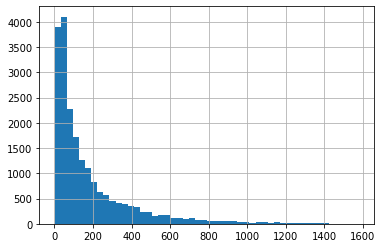

In [223]:
data['days_exposition'].hist(bins=50);

Считаем среднее, медиану и другие описательные статистики:

In [224]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Выводы**

Если в качестве типичного знанчения рассматривать среднее, то продажа обычно осуществляется за 180 дней, если брать медиану, то за 95 дней. Среднее значение некорректно характеризует данные, так как отдельные значения сильно выделяются среди большинства (имеются наблюдения с аномально высокими значениями, которые завышают эту описательную статистику), поэтому лучше использовать медиану. Минимальное значение состаляет 1 день, максимальное - 1580 дней (больше 4-х лет). Значение первой квартили - 45 дней - в первом приближении будем считать, что все продажи меньше это значение быстрые. Значение третьей квартили - 232 дня - в первом приближении будем считать, что все продажи больше это значение необычно долгие. 

Определяем, как общая площадь влияет на общую (полную) стоимость объекта.

Строим диаграмму рассеяния:

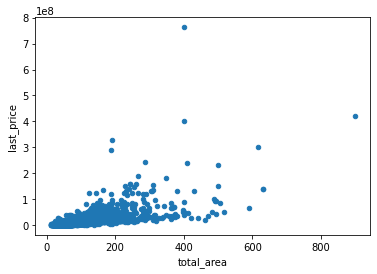

In [225]:
data.plot(x='total_area', y='last_price', kind='scatter');

Рассчитываем коэффициент корреляции Пирсона:

In [226]:
data['last_price'].corr(data['total_area'])

0.6536750579657242

**Вывод:** Диаграмма рассеяния и коэффициент Пирсона, равный 0.65, говорят о наличии средней положительной линейной связи. 

Определяем, как жилая площадь влияет на общую (полную) стоимость объекта.

Строим диаграмму рассеяния:

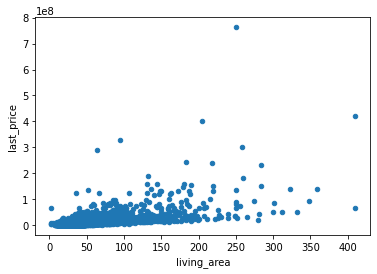

In [227]:
data.plot(x='living_area', y='last_price', kind='scatter');

Рассчитываем коэффициент корреляции Пирсона:

In [228]:
data['last_price'].corr(data['living_area'])

0.5857245164413091

**Вывод:** Диаграмма рассеяния и коэффициент Пирсона, равный 0.59, говорят о наличии средней положительной линейной связи.

Определяем, как площадь кухни влияет на общую (полную) стоимость объекта.

Строим диаграмму рассеяния:

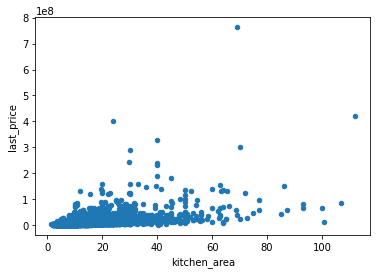

In [229]:
data.plot(x='kitchen_area', y='last_price', kind='scatter');

Рассчитываем коэффициент корреляции Пирсона:

In [230]:
data['last_price'].corr(data['kitchen_area'])

0.5134760486132083

**Вывод:** Диаграмма рассеяния и коэффициент Пирсона, равный 0.51, говорят о наличии средней положительной линейной связи. 

Определяем, как количество комнат влияет на общую (полную) стоимость объекта.

Строим диаграмму рассеяния:

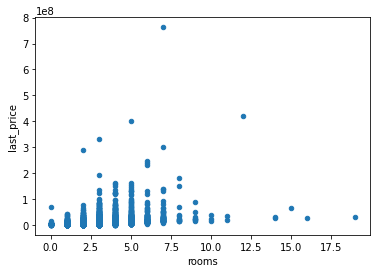

In [231]:
data.plot(x='rooms', y='last_price', kind='scatter');

Рассчитываем коэффициент корреляции Пирсона:

In [232]:
data['last_price'].corr(data['rooms'])

0.3633428499648948

**Вывод:** Диаграмма рассеяния и коэффициент Пирсона, равный 0.36, говорят о наличии слабой положительной линейной связи.

Определяем, как этаж, на котором расположена квартира, влияет на общую (полную) стоимость объекта.

Строим столбчатую диаграмму:

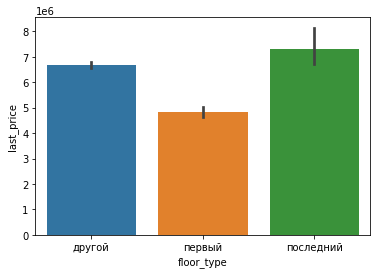

In [233]:
import seaborn as sns
ax = sns.barplot(x="floor_type", y="last_price", data=data)

**Вывод:** График говорит нам о том, что объекты на первом этаже - самые дешёвые.

Определяем, как день недели даты размещения влияет на общую (полную) стоимость объекта.

Строим столбчатую диаграмму:

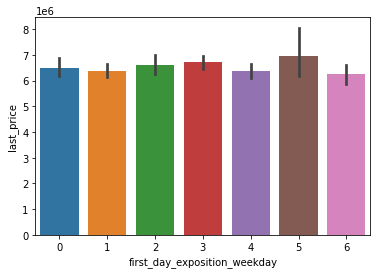

In [234]:
ax = sns.barplot(x="first_day_exposition_weekday", y="last_price", data=data)

**Вывод:** Связи между днём недели размещения объявления и стоимостью квартиры нет (цены распределены примерно равномерно по дням). 

Определяем, как месяц даты размещения влияет на общую (полную) стоимость объекта.

Строим столбчатую диаграмму:

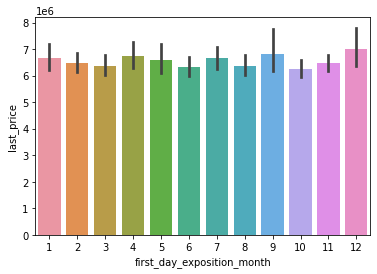

In [235]:
ax = sns.barplot(x="first_day_exposition_month", y="last_price", data=data)

**Вывод:** Связи между месяцем размещения объявления и стоимостью квартиры нет (цены распределены примерно равномерно по месяцам). 

Определяем, как год даты размещения влияет на общую (полную) стоимость объекта.

Строим стобчатую диаграмму:

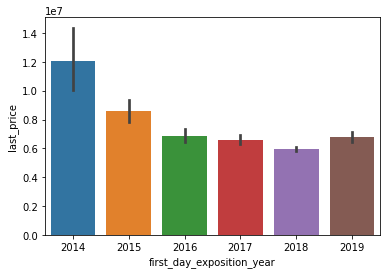

In [236]:
ax = sns.barplot(x="first_day_exposition_year", y="last_price", data=data)

**Вывод:** График говорит нам о том, что самые дорогие цены были в 2014 году, самые дешёвые в 2018 году.

**Выводы**

На общую стоимость объекта больше всего влияет общая площадь квартиры. Об этом говорит и диаграмма рассеяния и коэффициент Пирсона, равный 0.65, что говорит о наличии положительной линейной связи. Также имеется связь, однако менее выраженная, с жилой площадью, площадью кухни и числом комнат - коэффициент корреляции равен 0.57, 0.49 и 0.36 соответсвенно. Объекты на первом этаже - самые дешёвые, объявления 2014 года - самые дорогие. Отсутствует связь с днём недели и месяцем размещения объявления.

Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [237]:
group_data = data.groupby('locality_name').agg({'price_per_square_meter': ['count', 'mean']})

group_data.columns = ['count', 'mean']

group_data = group_data.sort_values('count', ascending=False).head(10)

group_data

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


Населённый пункт с самой высокой стоимостью квадратного метра:

In [238]:
max_price = group_data.sort_values('mean', ascending=False).head(1)
max_price

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794


Населённый пункт с самой низкой стоимостью квадратного метра:

In [239]:
min_price = group_data.sort_values('mean', ascending=True).head(1)
min_price

,count,mean
locality_name,,
Выборг,237,58141.909153


**Выводы**

Среди населённых пунктов с наибольшим число объявлений самую высокую стоимость одного квадратного метра имеет Санкт-Петербург - среднее значение составляет 114 849 на основе 15 721 объявлений. Самая низкая стоимость наблюдается в Выборге - 58 142 рубля за один квадратный метр (среднее значение на основе 237 объявлений).

Группируем данные по расстоянию до центра и рассчитываем в пределах каждой группы среднюю цену одного квадратного метра:

In [240]:
data_northern_capital = data.query('locality_name == "Санкт-Петербург"') # выбираем объявления, относящиеся к Санкт-Петербургу
import numpy as np
result = data_northern_capital.groupby('cityCenters_nearest_km').agg(
    price_per_square_meter=('price_per_square_meter', np.mean),
    total_area=('total_area', np.mean))
result

,price_per_square_meter,total_area
cityCenters_nearest_km,,
0.0,245833.530289,117.259259
1.0,177005.407676,104.999896
2.0,157849.007329,102.504000
3.0,121387.453704,90.273429
4.0,133282.874761,91.475494
5.0,140509.789046,95.887185
6.0,151012.193621,90.785615
7.0,156176.879664,82.058762
8.0,125671.442742,73.546114


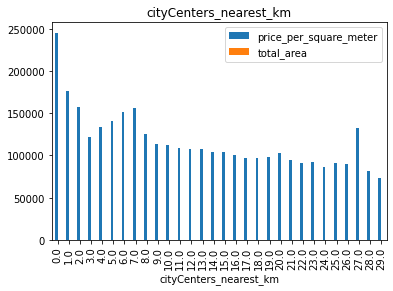

In [241]:
result.plot(kind = 'bar', title='cityCenters_nearest_km');

**Выводы**

Средняя цена одного квадратного метра квартир, находящихся непосредственно в центре Санкт-Петербурга составляет, 245 834 руб. Цена квартир на расстоянии 1 км уже значительно ниже -  177 005 руб, на расстояниие 2 и 3 км ещё меньше - 157 849 и 121 387 руб. Рост цены для объектов, находящихся на расстоянии 4, 5, 6, 7 и 8 км, можно объяснить другими факторами, например, большей площадью объектов. В целом, имеется закономерность - с удалением от центра города цена объекта уменьшается.

### Общий вывод

Исследование прошло в три этапа:
 1. Обзор данных;
 2. Предобработка данных;
 3. Проверка гипотез.
 
На первом этапе был выполнен обзор данных, в ходе которого определялось их качество и наличие ошибок.

На второй этапе эти ошибки были устранены. Предобработка данных включала в себя заполнение пропущенных значений в столбцах, обработку аномальных значений столбца, изменение типов данных столбца, удаление дубликатов и добавление новых столбцов.

В ходе последнего этапа - ислледовательского анализа данных и проверке гипотез - было установлено, что по имеющимя данным:
1. В среднем объявление закрывают чрез 95 дней после его публикации. Но есть аномально быстрые продажи - 1 день и необычно долгие - больше 4-х лет;
2. На общую стоимость объекта больше всего влияет общая площадь квартиры. Имеется связь, однако менее выраженная, с жилой площадью, площадью кухни и числом комнат. Отсутствует линейная связь с типом этажа и датой размещения;
3. Среди населённых пунктов с наибольшим число объявлений самую высокую стоимость одного квадратного метра имеет Санкт-Петербург - среднее значение составляет 114 849 на основе 15 721 объявлений. Самая низкая стоимость наблюдается в Выборге - 58 142 рубля за один квадратный метр (среднее значение на основе 237 объявлений);
4. С удалением от центра Санкт-Петербурга цена объекта уменьшается.

На практике исследования содержат проверки статистических гипотез. Из данных одного файла не всегда можно сделать вывод о всей генеральной совокупности. Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных.